# 21BAI1217 Mainak Chattopadhyay

Apply LoG, DoG, DoH for blob detection.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [ ]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

In [ ]:
def LoG(image, sigma):
    # Generate LoG kernel
    size = int(6 * sigma) // 2 * 2 + 1  # Ensure odd size
    kernel = gaussian_kernel(size, sigma)
    kernel = np.gradient(np.gradient(kernel, axis=0), axis=1)

    # Convolve with LoG kernel
    convolved = convolve(image, kernel)

    return convolved

In [ ]:
def DoG(image, sigma1, sigma2):
    # Generate DoG kernel
    size1 = int(6 * sigma1) // 2 * 2 + 1  # Ensure odd size
    size2 = int(6 * sigma2) // 2 * 2 + 1  # Ensure odd size
    kernel1 = gaussian_kernel(size1, sigma1)
    kernel2 = gaussian_kernel(size2, sigma2)

    # Convolve with DoG kernel
    convolved1 = convolve(image, kernel1)
    convolved2 = convolve(image, kernel2)

    return convolved1 - convolved2

In [ ]:
def DoH(image, sigma):
    # Compute second derivatives
    dx, dy = np.gradient(image)
    dxx, dxy = np.gradient(dx)
    dyx, dyy = np.gradient(dy)

    # Compute determinant of Hessian
    det_hessian = dxx * dyy - dxy * dyx

    return det_hessian

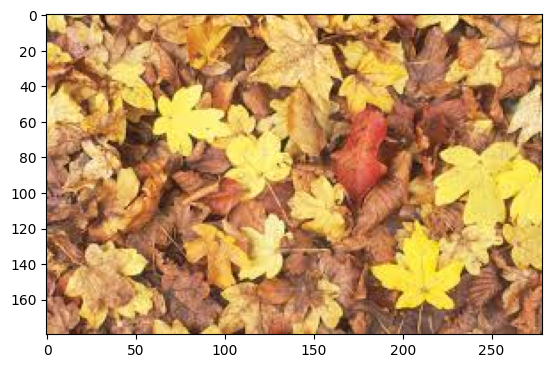

In [ ]:
#Example usage
image = plt.imread('images.jpeg')
image_gray = np.mean(image, axis=2) if len(image.shape) == 3 else image
plt.imshow(image)


In [ ]:
sigma = 1.0
log_result = LoG(image_gray, sigma)
dog_result = DoG(image_gray, sigma * 0.5, sigma * 1.5)
doh_result = DoH(image_gray, sigma)

In [ ]:
# Thresholding to enhance visualization
log_thresholded = log_result > np.mean(log_result) * 0.8
dog_thresholded = dog_result > np.mean(dog_result) * 0.8
doh_thresholded = doh_result > np.mean(doh_result) * 0.8

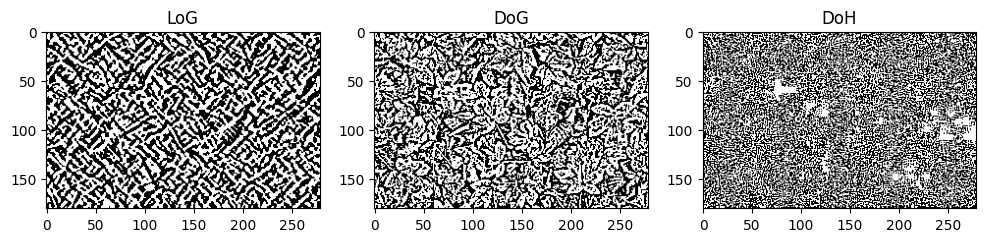

In [ ]:
# Displaying results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(log_thresholded, cmap='gray')
plt.title('LoG')

plt.subplot(132)
plt.imshow(dog_thresholded, cmap='gray')
plt.title('DoG')

plt.subplot(133)
plt.imshow(doh_thresholded, cmap='gray')
plt.title('DoH')

plt.show()

Apply Local Binary Pattern to extract the texture features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

In [ ]:
def rgb2gray(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

In [ ]:
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))
    val_ar.append(get_pixel(img, center, x, y+1))
    val_ar.append(get_pixel(img, center, x+1, y+1))
    val_ar.append(get_pixel(img, center, x+1, y))
    val_ar.append(get_pixel(img, center, x+1, y-1))
    val_ar.append(get_pixel(img, center, x, y-1))
    val_ar.append(get_pixel(img, center, x-1, y-1))
    val_ar.append(get_pixel(img, center, x-1, y))

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val


In [ ]:
def local_binary_pattern(image, P, R):
    image = rgb2gray(image)
    img = np.pad(image, R, mode='constant')
    lbp_img = np.zeros_like(image)
    for i in range(R, img.shape[0] - R):
        for j in range(R, img.shape[1] - R):
            lbp_img[i - R, j - R] = lbp_calculated_pixel(img, i, j)
    return lbp_img

In [ ]:
image = io.imread('images.jpeg')

In [ ]:
# Parameters for LBP
radius = 1
n_points = 8 * radius

In [ ]:
lbp_image = local_binary_pattern(image, n_points, radius)

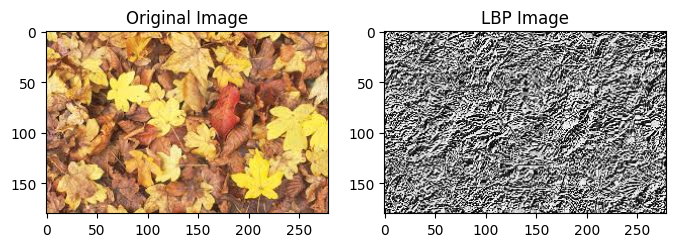

In [ ]:
# Display results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP Image')

plt.show()

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving LAB10_MV_21BAI1217.ipynb to LAB10_MV_21BAI1217.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>